### Practica 5

Regresion Logistica 

Michael Adolfo Huerta Ramírez

Cargue el datasetbreast-cancer.csv. En este dataset la columna diagnosises el target y puede tomar los valores M que indica que el cáncer es maligno y B que indica que es benigno. El resto de las columnas son las características

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



data = pd.read_csv(r'./breast-cancer.csv')
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [11]:
df = pd.DataFrame(data)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
x = df.loc[:, df.columns != 'diagnosis']
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
y = df.loc[:, df.columns == 'diagnosis']
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


Separe el dataseten un conjunto de entrenamiento (90%) y un conjunto de prueba (10%) utilizando random_state= 0

In [33]:
#Genere un conjunto de entrenamiento con 90% de los datos y 10% para pruebas,
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(x,y,test_size= 0.1, random_state= 0,shuffle = True) #Mezcle los datos (set random_state=0)


Utilizando el conjunto de entrenamiento entre un modelo con regresión logística

In [34]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) #la clase predicha
print ('\n Clase real', y_test)
print ('\n Clase predicha', y_pred,'\n\n')


 Clase real     diagnosis
512         M
457         B
439         B
298         B
37          B
515         B
382         B
310         B
538         B
345         B
421         B
90          B
412         B
157         B
89          B
172         M
318         B
233         M
389         M
250         M
31          M
283         M
482         B
211         B
372         M
401         B
159         B
14          M
364         B
337         M
179         B
1           M
466         B
132         M
140         B
64          M
224         B
127         M
434         B
353         M
414         M
358         B
10          M
546         B
465         B
564         M
175         B
235         B
188         B
15          M
12          M
194         M
134         M
463         B
301         B
348         B
231         B

 Clase predicha ['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B'

/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [44]:
print('\nMatriz de confusión')
print(confusion_matrix(y_test, y_pred).ravel())
print('\nAccuracy')
print('Porcentaje de instancias predichas correctamente',accuracy_score(y_test, y_pred)) 
print('Cantidad de instancias predichas correctamente',accuracy_score(y_test, y_pred, normalize=False), '\n\n') 



Matriz de confusión
[35  0 22  0]

Accuracy
Porcentaje de instancias predichas correctamente 0.6140350877192983
Cantidad de instancias predichas correctamente 35 




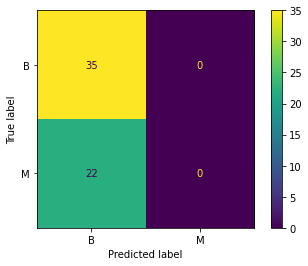

In [47]:
cm = confusion_matrix(y_test, y_pred,labels= clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()



In [46]:
y_pred_proba = clf.predict_proba(X_test) 
print ('\n Probabilidad de pertenecer a una clase\n', y_pred_proba ,'\n\n')
plt.show()


 Probabilidad de pertenecer a una clase
 [[0.50005645 0.49994355]
 [0.50056171 0.49943829]
 [0.50005606 0.49994394]
 [0.500055   0.499945  ]
 [0.5000527  0.4999473 ]
 [0.50005648 0.49994352]
 [0.50000556 0.49999444]
 [0.5000551  0.4999449 ]
 [0.50005678 0.49994322]
 [0.5000554  0.4999446 ]
 [0.50005588 0.49994412]
 [0.50005311 0.49994689]
 [0.50005582 0.49994418]
 [0.50053698 0.49946302]
 [0.50005311 0.49994689]
 [0.50000537 0.49999463]
 [0.50005513 0.49994487]
 [0.50543705 0.49456295]
 [0.50000557 0.49999443]
 [0.50005455 0.49994545]
 [0.50005262 0.49994738]
 [0.50054938 0.49945062]
 [0.50005625 0.49994375]
 [0.5005431  0.4994569 ]
 [0.50055557 0.49944443]
 [0.50005576 0.49994424]
 [0.5000537  0.4999463 ]
 [0.50521894 0.49478106]
 [0.50055546 0.49944454]
 [0.50005533 0.49994467]
 [0.50005385 0.49994615]
 [0.50005194 0.49994806]
 [0.50056178 0.49943822]
 [0.5053461  0.4946539 ]
 [0.50005357 0.49994643]
 [0.50529629 0.49470371]
 [0.50054327 0.49945673]
 [0.5000534  0.4999466 ]
 [0.5000